In [1]:
import pandas as pd
import matplotlib.pyplot as plt

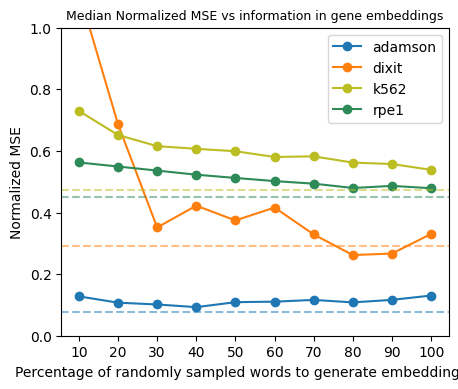

In [2]:
metric_ds = []
for dataset in ["dixit", "adamson", "k562", "rpe1"]:
    metric_props = []
    for prop in range(1, 11):
        proportion = prop * 10
        path = f"../extra/ablation_randomwords/results/{dataset}/Proportion_{proportion}.csv"
        df = pd.read_csv(path, index_col=0)
        metric = df.drop(columns=["split"]).median()
        metric = pd.DataFrame(metric, columns=[prop]).T.assign(Proportion=proportion)
        metric_props.append(metric)
    metric_ds.append(pd.concat(metric_props).assign(Dataset=dataset))
metric_ds = pd.concat(metric_ds)

og_mse = [0.078012, 0.291078, 0.473660, 0.450863]
colors = ["tab:blue", "tab:orange", "tab:olive", "seagreen"]
metric_pivot = metric_ds.pivot(index="Proportion", columns="Dataset", values="NormMSE")
metric_pivot.to_csv("/Users/pancake/Desktop/scouterplots/Supplementary_Data/Supplementary_Fig4.csv", index=True)
metric_pivot.plot(marker="o", linestyle="-", color=colors, figsize=(5, 4))
plt.xlabel("Percentage of randomly sampled words to generate embeddings (%)")
plt.xticks(range(10, 110, 10))
plt.ylabel("Normalized MSE")
plt.ylim(0, 1)
plt.title("Median Normalized MSE vs information in gene embeddings", fontsize=9)
plt.legend()
for i, mse in enumerate(og_mse):
    plt.axhline(y=mse, color=colors[i], linestyle='--', alpha=0.5)
plt.show()